In [118]:
from Simulation import Simulation, Parameters
from MasterEquation import Distribution, get_bins
import numpy as np
import matplotlib.pyplot as plt
from DB import DB, metadata_obj, engine

In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
bin_size = 0.05
ub = 1
lb = -1
bins = get_bins(ub=ub, lb=lb, bin_size=bin_size)
a = np.random.normal(loc=0, scale=0.2, size=100000)
b, _ = np.histogram(a=a, bins=bins)
d0 = b / np.linalg.norm(b, ord=1)
d0 = np.insert(arr=d0, obj=[0, d0.shape[0]], values=[0,0])
d = Distribution(d0=d0, bin_size=bin_size)

In [121]:
s_max = 10000
n_save_distributions = 100
t = 0.25
r = 1
e = 0.1

In [8]:
params = Parameters(sim_id=1, t=t, r=r, e=e, d=d, d0_name=f'norm_loc={0}_scale={0.2}', s_max=s_max, n_save_distributions=n_save_distributions)

In [9]:
sim = Simulation(params=params)

In [10]:
sim.run_simulation()

100%|██████████| 10000/10000 [07:05<00:00, 23.48it/s]


In [125]:
def plot_distributions(ax, sim_result):
    fontsize=20
    ax.set_xlabel('Opinion', fontsize=fontsize)
    ax.set_ylabel('Probability of opinion', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    keys = [0,100,200, 400, 800, 1600, 3200, 6400, 9900]
    n_keys = len(keys)
    colors = [cmap(1 - 0.7*(i/n_keys)) for i in range(n_keys)]
    for i, s in enumerate(keys):
        d = sim_result.distributions[s]
        ax.plot(d.get_left_bins(), d.d, color=colors[i], linewidth=1.2 + 0.7*(i/n_keys))
    return ax


In [314]:
def plot_colorbar(ax):
    fontsize=13
    ax.set_ylabel(r'Time', fontsize=fontsize+5, labelpad=-5)
    gradient = np.linspace(1, 0.2, 1000)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient.T, aspect='auto', cmap=plt.get_cmap('Greys'), vmin=0, vmax=1)
    start, end = ax.get_ylim()
    ax.set_yticks(ticks=[start, end], labels=['$10^4$', 0], fontsize=fontsize)
    ax.get_xaxis().set_visible(False)
    return ax

In [315]:
def plot_inset(ax, sim_result):
    fontsize=13
    ax.set_xlabel('Time', fontsize=fontsize)
    ax.set_ylabel(r'$L^2$-norm', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.plot(range(len(sim_result.l2_norm)), np.array(sim_result.l2_norm), color='red')
    return ax

In [316]:
def get_inset_ax(fig):
    left, bottom, width, height = [0.21, 0.55, 0.25, 0.3]
    ax = fig.add_axes([left, bottom, width, height])
    return ax

def get_colorbar_ax(fig):
    left, bottom, width, height = [0.835, 0.5, 0.05, 0.36]
    ax = fig.add_axes([left, bottom, width, height])
    return ax

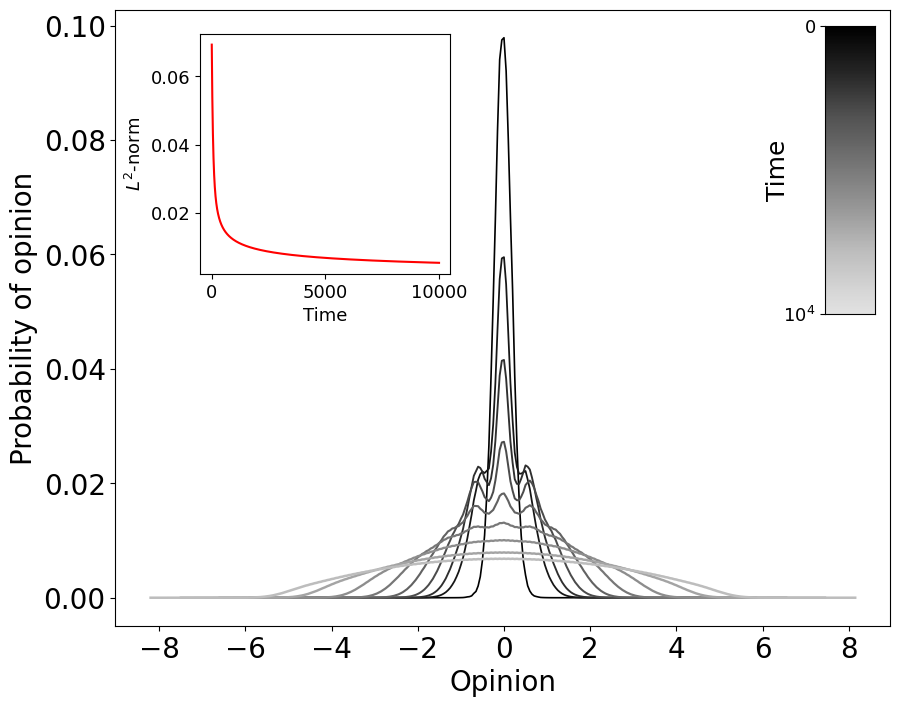

In [323]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = get_inset_ax(fig=fig)
ax3 = get_colorbar_ax(fig=fig)

ax1 = plot_distributions(ax=ax1, sim_result=sim.sim_result)
ax2 = plot_inset(ax=ax2, sim_result=sim.sim_result)
ax3 = plot_colorbar(ax=ax3)
fig.savefig('fig.pdf', bbox_inches='tight')

plt.show()

In [321]:
gradient = np.linspace(1, 0.9, 256)
gradient = np.vstack((gradient, gradient))

In [243]:
gradient.T

array([[1.        , 1.        ],
       [0.99960784, 0.99960784],
       [0.99921569, 0.99921569],
       [0.99882353, 0.99882353],
       [0.99843137, 0.99843137],
       [0.99803922, 0.99803922],
       [0.99764706, 0.99764706],
       [0.9972549 , 0.9972549 ],
       [0.99686275, 0.99686275],
       [0.99647059, 0.99647059],
       [0.99607843, 0.99607843],
       [0.99568627, 0.99568627],
       [0.99529412, 0.99529412],
       [0.99490196, 0.99490196],
       [0.9945098 , 0.9945098 ],
       [0.99411765, 0.99411765],
       [0.99372549, 0.99372549],
       [0.99333333, 0.99333333],
       [0.99294118, 0.99294118],
       [0.99254902, 0.99254902],
       [0.99215686, 0.99215686],
       [0.99176471, 0.99176471],
       [0.99137255, 0.99137255],
       [0.99098039, 0.99098039],
       [0.99058824, 0.99058824],
       [0.99019608, 0.99019608],
       [0.98980392, 0.98980392],
       [0.98941176, 0.98941176],
       [0.98901961, 0.98901961],
       [0.98862745, 0.98862745],
       [0.

In [ ]:
cmap = plt.get_cmap('Greys')

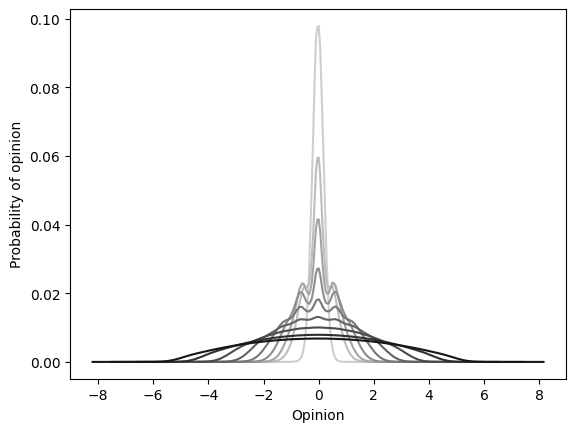

In [27]:
sim.sim_result.distributions.keys()

dict_keys([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900])

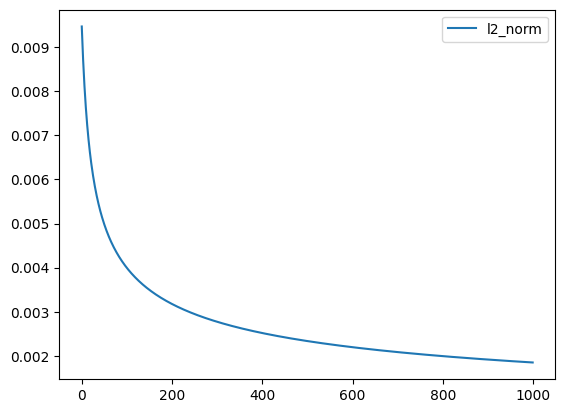

In [47]:
plt.figure()
plt.plot(np.array(sim.sim_result.l2_norm), label='l2_norm')
plt.legend()
plt.show()

In [132]:
metadata_obj.drop_all(bind=engine)

In [8]:
DB.create_simulation_table()

In [9]:
DB.insert_simulation_result(simulation_result=s.sim_result)

In [48]:
a, b, c = DB.get_simulation_result(sim_id=1)

In [49]:
a

,index,time,l2_norm
0,1,0,0.070302
1,2,1,0.070302
2,3,2,0.070302
3,4,3,0.070302
4,5,4,0.070302
...,...,...,...
995,996,995,0.070302
996,997,996,0.070302
997,998,997,0.070302
998,999,998,0.070302


 Loading 100 %

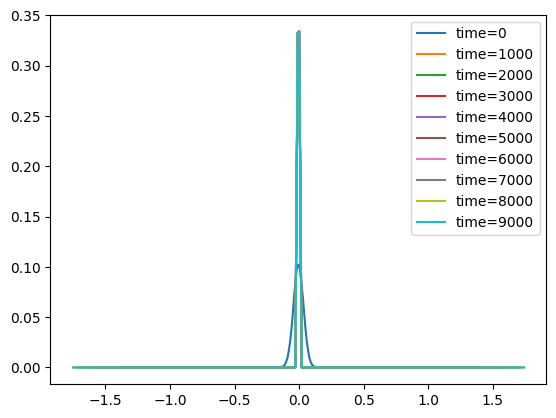

In [79]:
max_iter = 10000
plots = 10
plt.figure()
for i in range(max_iter):
    print('\r', f'Loading {int(np.round(100*i/max_iter, decimals=0))} %', end='')
    d = me.step()
    if i % int(max_iter/plots) == 0:
        d_half = int(np.round(d.d.shape[0]/2, decimals=0))
        x = np.arange(-d_half, d_half)*bin_size
        plt.plot(x,d.d, label=f'time={i}')

plt.legend()
plt.show()

In [63]:
np.max(d.d)

0.049267154784685144

In [40]:
d.d.shape[0]

1018

In [45]:
d_range = int(np.round(d.d.shape[0]/2, decimals=0))*bin_size
x = np.arange(-d_range, d_range, step=bin_size)

array([-25.45, -25.4 , -25.35, ...,  25.35,  25.4 ,  25.45])

In [52]:
d_half = int(np.round(d.d.shape[0]/2, decimals=0))
a = np.arange(0, d_half)
x = np.append(a, )

In [53]:
x[d_half]

0.0